In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import random
from datetime import datetime
import json
import time

In [2]:
from sklearn import preprocessing

In [3]:
data_dir = Path.cwd().parent / 'DATA'

In [4]:
# define target column
TARGET = "contest-tmp2m-14d__tmp2m"

In [5]:
pd.set_option('display.max_columns', 500)

# 0. Load Train/Test Data

In [6]:
%%time
train_df = pd.read_parquet(data_dir / "train_data.parquet")
print(f"training dataframe -> rows: {train_df.shape[0]}, cols: {train_df.shape[1]}")
train_mem_size = train_df.memory_usage(deep=True).sum() / 1024
print(f"-- memory usage: {round(train_mem_size):,} MB")

training dataframe -> rows: 375734, cols: 246
-- memory usage: 761,726 MB
CPU times: total: 1.86 s
Wall time: 489 ms


In [7]:
train_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-tmp2m-14d__tmp2m,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010

In [8]:
%%time
test_df = pd.read_parquet(data_dir / "test_data.parquet")
# test_df = pd.read_csv(data_dir / "test_data.csv")
print(f"training dataframe -> rows: {test_df.shape[0]}, cols: {test_df.shape[1]}")
test_mem_size = test_df.memory_usage(deep=True).sum() / 1024
print(f"-- memory usage: {round(test_mem_size):,} MB")

training dataframe -> rows: 31354, cols: 245
-- memory usage: 63,342 MB
CPU times: total: 15.6 ms
Wall time: 71.6 ms


In [9]:
test_df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,nmme0-prate-34w__ccsm30,nmme0-prate-34w__ccsm40,nmme0-prate-34w__cfsv20,nmme0-prate-34w__gfdlflora0,nmme0-prate-34w__gfdlflorb0,nmme0-prate-34w__gfdl0,nmme0-prate-34w__nasa0,nmme0-prate-34w__nmme0mean,contest-slp-14d__slp,contest-wind-vwnd-925-14d__wind-vwnd-925,nmme-prate-56w__cancm3,nmme-prate-56w__cancm4,nmme-prate-56w__ccsm3,nmme-prate-56w__ccsm4,nmme-prate-56w__cfsv2,nmme-prate-56w__gfdl,nmme-prate-56w__gfdlflora,nmme-prate-56w__gfdlflorb,nmme-prate-56w__nasa,nmme-prate-56w__nmmemean,contest-pres-sfc-gauss-14d__pres,contest-wind-uwnd-250-14d__wind-uwnd-250,nmme-tmp2m-34w__cancm3,nmme-tmp2m-34w__cancm4,nmme-tmp2m-34w__ccsm3,nmme-tmp2m-34w__ccsm4,nmme-tmp2m-34w__cfsv2,nmme-tmp2m-34w__gfdl,nmme-tmp2m-34w__gfdlflora,nmme-tmp2m-34w__gfdlflorb,nmme-tmp2m-34w__nasa,nmme-tmp2m-34w__nmmemean,contest-prwtr-eatm-14d__prwtr,contest-wind-vwnd-250-14d__wind-vwnd-250,contest-precip-14d__precip,contest-wind-h850-14d__wind-hgt-850,contest-wind-uwnd-925-14d__wind-uwnd-925,contest-wind-h500-14d__wind-hgt-500,cancm30,cancm40,ccsm30,ccsm40,cfsv20,gfdlflora0,gfdlflorb0,gfdl0,nasa0,nmme0mean,climateregions__climateregion,elevation__elevation,wind-vwnd-250-2010-1,wind-vwnd-250-2010-2,wind-vwnd-250-2010-3,wind-vwnd-250-2010-4,wind-vwnd-250-2010-5,wind-vwnd-250-2010-6,wind-vwnd-250-2010-7,wind-vwnd-250-2010-8,wind-vwnd-250-2010-9,wind-vwnd-250-2010-10,wind-vwnd-250-2010-11,wind-vwnd-250-2010-12,wind-vwnd-250-2010-13,wind-vwnd-250-2010-14,wind-vwnd-250-2010-15,wind-vwnd-250-2010-16,wind-vwnd-250-2010-17,wind-vwnd-250-2010-18,wind-vwnd-250-2010-19,wind-vwnd-250-2010-20,wind-uwnd-250-2010-1,wind-uwnd-250-2010-2,wind-uwnd-250-2010-3,wind-uwnd-250-2010-4,wind-uwnd-250-2010-5,wind-uwnd-250-2010-6,wind-uwnd-250-2010-7,wind-uwnd-250-2010-8,wind-uwnd-250-2010-9,wind-uwnd-250-2010-10,wind-uwnd-250-2010-11,wind-uwnd-250-2010-12,wind-uwnd-250-2010-13,wind-uwnd-250-2010-14,wind-uwnd-250-2010-15,wind-uwnd-250-2010-16,wind-uwnd-250-2010-17,wind-uwnd-250-2010-18,wind-uwnd-250-2010-19,wind-uwnd-250-2010-20,mjo1d__phase,mjo1d__amplitude,mei__mei,mei__meirank,mei__nip,wind-hgt-850-2010-1,wind-hgt-850-2010-2,wind-hgt-850-2010-3,wind-hgt-850-2010-4,wind-hgt-850-2010-5,wind-hgt-850-2010-6,wind-hgt-850-2010-7,wind-hgt-850-2010-8,wind-hgt-850-2010-9,wind-hgt-850-2010-10,sst-2010-1,sst-2010-2,sst-2010-3,sst-2010-4,sst-2010-5,sst-2010-6,sst-2010-7,sst-2010-8,sst-2010-9,sst-2010-10,wind-hgt-500-2010-1,wind-hgt-500-2010-2,wind-hgt-500-2010-3,wind-hgt-500-2010-4,wind-hgt-500-2010-5,wind-hgt-500-2010-6,wind-hgt-500-2010-7,wind-hgt-500-2010-8,wind-hgt-500-2010-9,wind-hgt-500-2010-10,icec-2010-1,icec-2010-2,icec-2010-3,icec-2010-4,icec-2010-5,icec-2010-6,icec-2010-7,icec-2010-8,icec-2010-9,icec-2010-10,wind-uwnd-925-2010-1,wind-uwnd-925-2010-2,wind-uwnd-925-2010-3,wind-uwnd-925-2010-4,wind-uwnd-925-2010-5,wind-uwnd-925-2010-6,w

In [10]:
target_min = train_df[TARGET].min()
target_delta = train_df[TARGET].max() - target_min
print(f"target variable range -> from: {target_min} to: {target_min + target_delta} deg C")

target variable range -> from: -20.35896342 to: 37.23878207 deg C


# 1. Address Data Quality Issues

## a. Location Mismatch between Train & Test

ref: <https://www.kaggle.com/code/flaviafelicioni/wids-2023-different-locations-train-test-solved>

In [11]:
SCALE = 14

In [12]:
def fix_locations(in_df: pd.DataFrame, lbl: str) -> pd.DataFrame:
    print(f"{lbl.upper()} dataset")
    for col in ["lat", "lon"]:
        in_df.loc[:, col] = round(in_df[col], SCALE)
        coord_map = {coord: str(n) for n, coord in enumerate(in_df[col].unique().tolist())}
        print(f"- assigning {col} codes from 0 to {len(coord_map) - 1}")
        in_df[f"{col}_cd"] = in_df[col].map(coord_map)
    in_df["location"] = in_df["lat_cd"] + "_" + in_df["lon_cd"]
    return in_df

In [13]:
train1_df = fix_locations(in_df=train_df, lbl="train")
test1_df = fix_locations(in_df=test_df, lbl="test")

TRAIN dataset
- assigning lat codes from 0 to 22
- assigning lon codes from 0 to 30
TEST dataset
- assigning lat codes from 0 to 22
- assigning lon codes from 0 to 30


In [14]:
# Concatenate train and test data
all_df = pd.concat([train1_df, test1_df], axis=0)

# Create new feature
all_df['loc_group'] = all_df.groupby(['lat','lon']).ngroup()

print(f'{all_df.loc_group.nunique()} unique locations')

514 unique locations


In [15]:
print(f"{len(all_df['location'].unique())} unique location codes")

514 unique location codes


In [16]:
train_df, test_df = "", ""

## b. Fill Missing Values w/ Mean

In [17]:
def fill_missing(in_df: pd.DataFrame) -> pd.DataFrame:
    out_df = in_df.copy()
    cols_w_na = in_df.columns[in_df.isna().any()].to_list()
    if len(cols_w_na):
        print("columns with missing values:\n")
        count_tot = out_df.shape[0]
        for col in cols_w_na:
            count_na = out_df[col].isna().sum()
            print(f"{col} -> count missing: {count_na}, percent: {round(count_na / count_tot * 100, 2)}%")
            col_mean = out_df[col].mean()
            print(f"-- mean: {round(col_mean, 4)}\n")
            out_df[col] = out_df[col].fillna(col_mean)
    else:
        print("no columns w/ missing values")
    return out_df

In [18]:
train2_df = fill_missing(in_df=train1_df)

columns with missing values:

nmme0-tmp2m-34w__ccsm30 -> count missing: 15934, percent: 4.24%
-- mean: 10.0993

nmme-tmp2m-56w__ccsm3 -> count missing: 10280, percent: 2.74%
-- mean: 9.6632

nmme-prate-34w__ccsm3 -> count missing: 8738, percent: 2.33%
-- mean: 31.2615

nmme0-prate-56w__ccsm30 -> count missing: 15934, percent: 4.24%
-- mean: 29.624

nmme0-prate-34w__ccsm30 -> count missing: 15934, percent: 4.24%
-- mean: 29.6526

nmme-prate-56w__ccsm3 -> count missing: 10280, percent: 2.74%
-- mean: 32.0076

nmme-tmp2m-34w__ccsm3 -> count missing: 8738, percent: 2.33%
-- mean: 9.821

ccsm30 -> count missing: 15934, percent: 4.24%
-- mean: 10.1015



In [19]:
test2_df = fill_missing(in_df=test1_df)

no columns w/ missing values


In [20]:
train1_df, test1_df = "", ""

# 2. Transform Data

## a. Load Grouped Columns

In [21]:
cols_file = 'artifacts/columns.json'
print("Column Group (n) \n---------------")
with open(cols_file, 'r') as js_in:
    groups_cols = json.load(js_in)
    for group, col_list in groups_cols.items():
        print(f"{group}: {len(col_list)}")

Column Group (n) 
---------------
info: 3
geography: 4
precip: 4
nmme0: 30
wind-h: 44
nmme: 40
pressure: 2
wind-v: 42
wind-u: 42
temp_forecast: 10
mjo: 2
mei: 3
sst: 10
icec: 10


In [22]:
selected_groups = ['precip', 'pressure', 'nmme0', 'nmme', 'temp-forecast', 'mjo', 'mei']

In [45]:
def make_col_group(col_type: str, group_list: list) -> list:
    return_cols = []
    for group, col_list in groups_cols.items():
        if group in group_list:
            return_cols.extend(col_list)
        else:
            for col_nm in col_list:
                if \
                    col_nm.find('2010-3') > -1 or \
                    col_nm.find('2010-4') > -1 or \
                    col_nm.find('2010-5') > -1 or \
                    col_nm.find('contest') > -1:
                    return_cols.append(col_nm)
    return_cols.remove(TARGET)
    print(f"{col_type} returned columns: {len(return_cols)}")
    return return_cols

In [24]:
selected_cols = make_col_group(col_type='feature', group_list=selected_groups)

feature returned columns: 123


In [25]:
baseline_cols = ["location", "index", "startdate", "lat", "lon", "elevation__elevation"]
keep_test = baseline_cols + selected_cols
keep_train = keep_test + [TARGET]

In [26]:
train3_df = train2_df[keep_train].copy()
test3_df = test2_df[keep_test].copy()

In [27]:
train2_df, test2_df = "", ""

In [28]:
print(f"train3 dataframe -> rows: {train3_df.shape[0]}, cols: {train3_df.shape[1]}")
print(f"test3 dataframe -> rows: {test3_df.shape[0]}, cols: {test3_df.shape[1]}")

train3 dataframe -> rows: 375734, cols: 130
test3 dataframe -> rows: 31354, cols: 129


## b. Create Date Features

In [29]:
date_cols = ["startdate", "date", "year", "month", "week", "day_of_year"]

In [30]:
def prep_features(in_df: pd.DataFrame) -> pd.DataFrame:
    in_df["date"] = pd.to_datetime(in_df["startdate"])
    in_df["year"] = in_df["date"].dt.isocalendar().year
    in_df["week"] = in_df["date"].dt.isocalendar().week.astype(int)
    in_df["month"] = in_df["date"].dt.month
    first_day = pd.to_datetime({"year": in_df["year"], "month": "01", "day": "01"})
    in_df["day_of_year"] = (in_df["date"] - first_day).dt.days
    print(in_df[date_cols].head())
    return in_df.drop(columns="startdate")

In [31]:
%%time
train4_df = prep_features(in_df=train3_df)

  startdate       date  year  month  week  day_of_year
0    9/1/14 2014-09-01  2014      9    36          243
1    9/2/14 2014-09-02  2014      9    36          244
2    9/3/14 2014-09-03  2014      9    36          245
3    9/4/14 2014-09-04  2014      9    36          246
4    9/5/14 2014-09-05  2014      9    36          247
CPU times: total: 14.9 s
Wall time: 21.7 s


In [32]:
%%time
test4_df = prep_features(in_df=test3_df)

  startdate       date  year  month  week  day_of_year
0   11/1/22 2022-11-01  2022     11    44          304
1   11/2/22 2022-11-02  2022     11    44          305
2   11/3/22 2022-11-03  2022     11    44          306
3   11/4/22 2022-11-04  2022     11    44          307
4   11/5/22 2022-11-05  2022     11    44          308
CPU times: total: 31.2 ms
Wall time: 71.8 ms


In [33]:
train3_df, test3_df = "", ""

## c. Apply Scaling - SKIP

In [34]:
# scaler = preprocessing.MinMaxScaler()

In [35]:
# date_part_cols = date_cols.copy()
# date_part_cols.remove("date")
# date_part_cols.remove("year")

# scaled_test_cols = date_part_cols + selected_cols + ["elevation__elevation"]
# scaled_train_cols = scaled_test_cols + [TARGET]
# passthrough_cols = ["index", "location", "date", "lat", "lon"]

In [36]:
def scale_features(in_df: pd.DataFrame, scaled_cols: list) -> pd.DataFrame:
    slct_df = in_df[scaled_cols]
    scaler.fit(slct_df)
    scaled_ndarray = scaler.transform(slct_df)
    out_df = pd.DataFrame(scaled_ndarray)
    out_df.columns = scaled_cols
    out_df[passthrough_cols] = in_df[passthrough_cols]
    out_df.index = in_df["date"]
    return out_df

In [37]:
# %%time
# train_scaled = scale_features(in_df=train4_df, scaled_cols=scaled_train_cols)
# train_scaled.head()

In [38]:
# %%time
# test_scaled = scale_features(in_df=test4_df, scaled_cols=scaled_test_cols)
# test_scaled.head()

In [39]:
# train4_df, test4_df = '', ''

## d. Create Lag Features by Location

In [40]:
all_locations = train4_df["location"].unique().tolist()
print(f"all unique locations: {len(all_locations)}")

all unique locations: 514


In [41]:
LAGS = [1]

In [42]:
def create_lag_cols(in_df: pd.DataFrame, lbl: str, cols_to_lag: list) -> pd.DataFrame:
    print(f"{lbl.upper()} dataset lagged columns:")
    loc_dfs = []
    for n, location_cd in enumerate(all_locations):
        loc_df = in_df[in_df["location"] == location_cd].copy()
        for lag in LAGS:
            for m, col in enumerate(cols_to_lag, start=1):
                if not n and lag == 1:
                    print(m, col)
                lag_col = pd.DataFrame(
                    loc_df[col].shift(lag),
                    columns=[f"{col}__lag{lag}"],
                )
                loc_df = pd.concat([loc_df, lag_col], axis=1)
        loc_df = loc_df.fillna(0)
        loc_dfs.append(loc_df)
        if not n % 50:
            print(f"...{n}", end="")
    comb_df = pd.concat(loc_dfs)
    print(f"\ncombined dataframe -> rows: {comb_df.shape[0]}, cols: {comb_df.shape[1]}")
    print(f"-- check unique locations: {len(comb_df['location'].unique())}")
    return comb_df

In [43]:
%%time
train_lagged = create_lag_cols(in_df=train4_df, lbl="train", cols_to_lag=selected_cols)

TRAIN dataset lagged columns:
1 contest-pevpr-sfc-gauss-14d__pevpr
2 contest-rhum-sig995-14d__rhum
3 contest-prwtr-eatm-14d__prwtr
4 contest-precip-14d__precip
5 nmme0-tmp2m-34w__cancm30
6 nmme0-tmp2m-34w__cancm40
7 nmme0-tmp2m-34w__ccsm30
8 nmme0-tmp2m-34w__ccsm40
9 nmme0-tmp2m-34w__cfsv20
10 nmme0-tmp2m-34w__gfdlflora0
11 nmme0-tmp2m-34w__gfdlflorb0
12 nmme0-tmp2m-34w__gfdl0
13 nmme0-tmp2m-34w__nasa0
14 nmme0-tmp2m-34w__nmme0mean
15 nmme0-prate-56w__cancm30
16 nmme0-prate-56w__cancm40
17 nmme0-prate-56w__ccsm30
18 nmme0-prate-56w__ccsm40
19 nmme0-prate-56w__cfsv20
20 nmme0-prate-56w__gfdlflora0
21 nmme0-prate-56w__gfdlflorb0
22 nmme0-prate-56w__gfdl0
23 nmme0-prate-56w__nasa0
24 nmme0-prate-56w__nmme0mean
25 nmme0-prate-34w__cancm30
26 nmme0-prate-34w__cancm40
27 nmme0-prate-34w__ccsm30
28 nmme0-prate-34w__ccsm40
29 nmme0-prate-34w__cfsv20
30 nmme0-prate-34w__gfdlflora0
31 nmme0-prate-34w__gfdlflorb0
32 nmme0-prate-34w__gfdl0
33 nmme0-prate-34w__nasa0
34 nmme0-prate-34w__nmme0mean
35

In [44]:
%%time
test_lagged = create_lag_cols(in_df=test4_df, lbl="test", cols_to_lag=selected_cols)

TEST dataset lagged columns:
1 contest-pevpr-sfc-gauss-14d__pevpr
2 contest-rhum-sig995-14d__rhum
3 contest-prwtr-eatm-14d__prwtr
4 contest-precip-14d__precip
5 nmme0-tmp2m-34w__cancm30
6 nmme0-tmp2m-34w__cancm40
7 nmme0-tmp2m-34w__ccsm30
8 nmme0-tmp2m-34w__ccsm40
9 nmme0-tmp2m-34w__cfsv20
10 nmme0-tmp2m-34w__gfdlflora0
11 nmme0-tmp2m-34w__gfdlflorb0
12 nmme0-tmp2m-34w__gfdl0
13 nmme0-tmp2m-34w__nasa0
14 nmme0-tmp2m-34w__nmme0mean
15 nmme0-prate-56w__cancm30
16 nmme0-prate-56w__cancm40
17 nmme0-prate-56w__ccsm30
18 nmme0-prate-56w__ccsm40
19 nmme0-prate-56w__cfsv20
20 nmme0-prate-56w__gfdlflora0
21 nmme0-prate-56w__gfdlflorb0
22 nmme0-prate-56w__gfdl0
23 nmme0-prate-56w__nasa0
24 nmme0-prate-56w__nmme0mean
25 nmme0-prate-34w__cancm30
26 nmme0-prate-34w__cancm40
27 nmme0-prate-34w__ccsm30
28 nmme0-prate-34w__ccsm40
29 nmme0-prate-34w__cfsv20
30 nmme0-prate-34w__gfdlflora0
31 nmme0-prate-34w__gfdlflorb0
32 nmme0-prate-34w__gfdl0
33 nmme0-prate-34w__nasa0
34 nmme0-prate-34w__nmme0mean
35 

In [46]:
# train_scaled, test_scaled = '', ''
train4_df, test4_df = '', ''

In [47]:
output_dfs = {
    "train": train_lagged,
    "test": test_lagged,
}

In [48]:
for df_lbl, df in output_dfs.items():
    out_file = data_dir / f"200_{df_lbl}_lagged.parquet"
    df.to_parquet(out_file)

# 3. Train/Val Splitting

## a. Simple Split (naive, two-fold)

In [49]:
TRAIN_PCNT = 0.8

In [50]:
FIG_SIZE = (15,9)

In [51]:
train_lagged["date"].describe(datetime_is_numeric=True)

count                           375734
mean     2015-08-31 23:59:59.999999744
min                2014-09-01 00:00:00
25%                2015-03-02 00:00:00
50%                2015-09-01 00:00:00
75%                2016-03-02 00:00:00
max                2016-08-31 00:00:00
Name: date, dtype: object

In [52]:
cutoff_date = train_lagged["date"].quantile(q=TRAIN_PCNT)

In [53]:
train_split = train_lagged.copy()
train_split["split"] = train_split["date"].apply(lambda x: "train" if x <= cutoff_date else "val")
train_split["split"].value_counts()

train    300690
val       75044
Name: split, dtype: int64

In [54]:
sample_loc = "12_13"

In [55]:
sample_df = train_split.loc[train_split["location"] == sample_loc, ["date", TARGET, "split"]]
print(f"sample location -> rows: {sample_df.shape[0]}, cols: {sample_df.shape[1]}")
sample_df["split"].value_counts()

sample location -> rows: 731, cols: 3


train    585
val      146
Name: split, dtype: int64

In [56]:
color_map = {"train": "b", "val": "r"}

In [57]:
colors = sample_df.split.map(color_map)

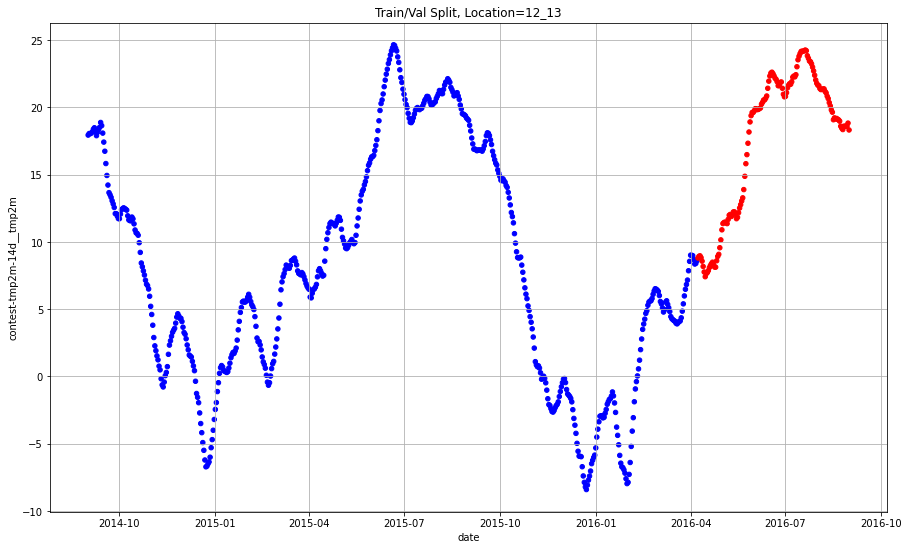

In [58]:
sample_df.plot.scatter(
    x="date", y=TARGET, 
    figsize=FIG_SIZE, marker="o", 
    color=colors, 
    title=f"Train/Val Split, Location={sample_loc}"
)
plt.grid()
plt.show()

# 4. Modeling

In [59]:
TRIAL = 5

In [60]:
artifact_dir = Path.cwd() / 'artifacts'

In [61]:
info_cols = ["index", "date", "year", "location", "split"]

In [62]:
feature_cols = [c for c in train_split.columns if (c not in info_cols) and (c != TARGET)]
print(f"selected {len(feature_cols)} features")
keep_cols = feature_cols.copy()
keep_cols.append("split")

selected 252 features


In [63]:
def check_missing(in_df: pd.DataFrame) -> None:
    cols_w_na = in_df.columns[in_df.isna().any()].to_list()
    if len(cols_w_na):
        print("columns with missing values:\n")
        count_tot = in_df.shape[0]
        for col in cols_w_na:
            count_na = in_df[col].isna().sum()
            print(f"{col} -> count missing: {count_na}, percent: {round(count_na / count_tot * 100, 2)}%")
            col_mean = in_df[col].mean()
            print(f"-- mean: {round(col_mean, 4)}\n")
    else:
        print("no columns w/ missing values")

In [64]:
check_missing(in_df=train_split)

no columns w/ missing values


### > create sample dataset for testing

In [65]:
SMPL_SZ = 100

In [66]:
n_locations = len(all_locations)
smpl_indices = random.sample(range(0, n_locations), SMPL_SZ)
smpl_locs = [all_locations[i] for i in smpl_indices]
smpl_dfs = []
print(f"included locations: {SMPL_SZ}")
for loc in smpl_locs:
    if SMPL_SZ < 25:
        print(f"{loc}, ", end="")
    loc_df = train_split[train_split["location"] == loc]
    smpl_dfs.append(loc_df)
train_samples = pd.concat(smpl_dfs)
print(f"\ndownsample dataframe -> rows: {train_samples.shape[0]}, cols: {train_samples.shape[1]}")

included locations: 100

downsample dataframe -> rows: 73100, cols: 258


## a. XGBoost

In [67]:
import xgboost as xgb
from xgboost import plot_importance, plot_tree

In [68]:
# seperate features and target
X, Y = train_split[keep_cols], train_split[[TARGET, "split", "location"]]
# X, Y = train_samples[keep_cols], train_samples[[TARGET, "split", "location"]]

In [69]:
# Split in train-test
X_train = X.loc[X["split"] == "train", feature_cols]
X_val = X.loc[X["split"] == "val", feature_cols]
Y_train = Y.loc[Y["split"] == "train", TARGET]
Y_val = Y.loc[Y["split"] == "val", TARGET]

In [70]:
# Initialize the estimator
model_params = {
    'n_estimators': 2500,
    'early_stopping_rounds': 50,
    'learning_rate': 0.05,
}
reg = xgb.XGBRegressor(**model_params)

In [71]:
%%time
# Fit the data
start = time.time()
reg.fit(
    X_train, Y_train,
    eval_set=[(X_train, Y_train), (X_val, Y_val)],
    verbose=25,
       )
duration = round(time.time() - start)
print(f"{duration=}")

[0]	validation_0-rmse:12.89741	validation_1-rmse:18.92783
[25]	validation_0-rmse:3.97911	validation_1-rmse:5.29520
[50]	validation_0-rmse:1.71502	validation_1-rmse:2.03132
[75]	validation_0-rmse:1.20465	validation_1-rmse:1.55083
[100]	validation_0-rmse:1.04899	validation_1-rmse:1.48716
[125]	validation_0-rmse:0.96394	validation_1-rmse:1.45667
[150]	validation_0-rmse:0.90958	validation_1-rmse:1.45037
[175]	validation_0-rmse:0.86380	validation_1-rmse:1.44155
[200]	validation_0-rmse:0.82681	validation_1-rmse:1.42953
[225]	validation_0-rmse:0.79352	validation_1-rmse:1.42487
[250]	validation_0-rmse:0.76366	validation_1-rmse:1.41473
[275]	validation_0-rmse:0.73741	validation_1-rmse:1.40746
[300]	validation_0-rmse:0.71540	validation_1-rmse:1.40526
[325]	validation_0-rmse:0.69786	validation_1-rmse:1.40063
[350]	validation_0-rmse:0.68154	validation_1-rmse:1.39584
[375]	validation_0-rmse:0.66358	validation_1-rmse:1.39088
[400]	validation_0-rmse:0.64588	validation_1-rmse:1.38240
[425]	validation_

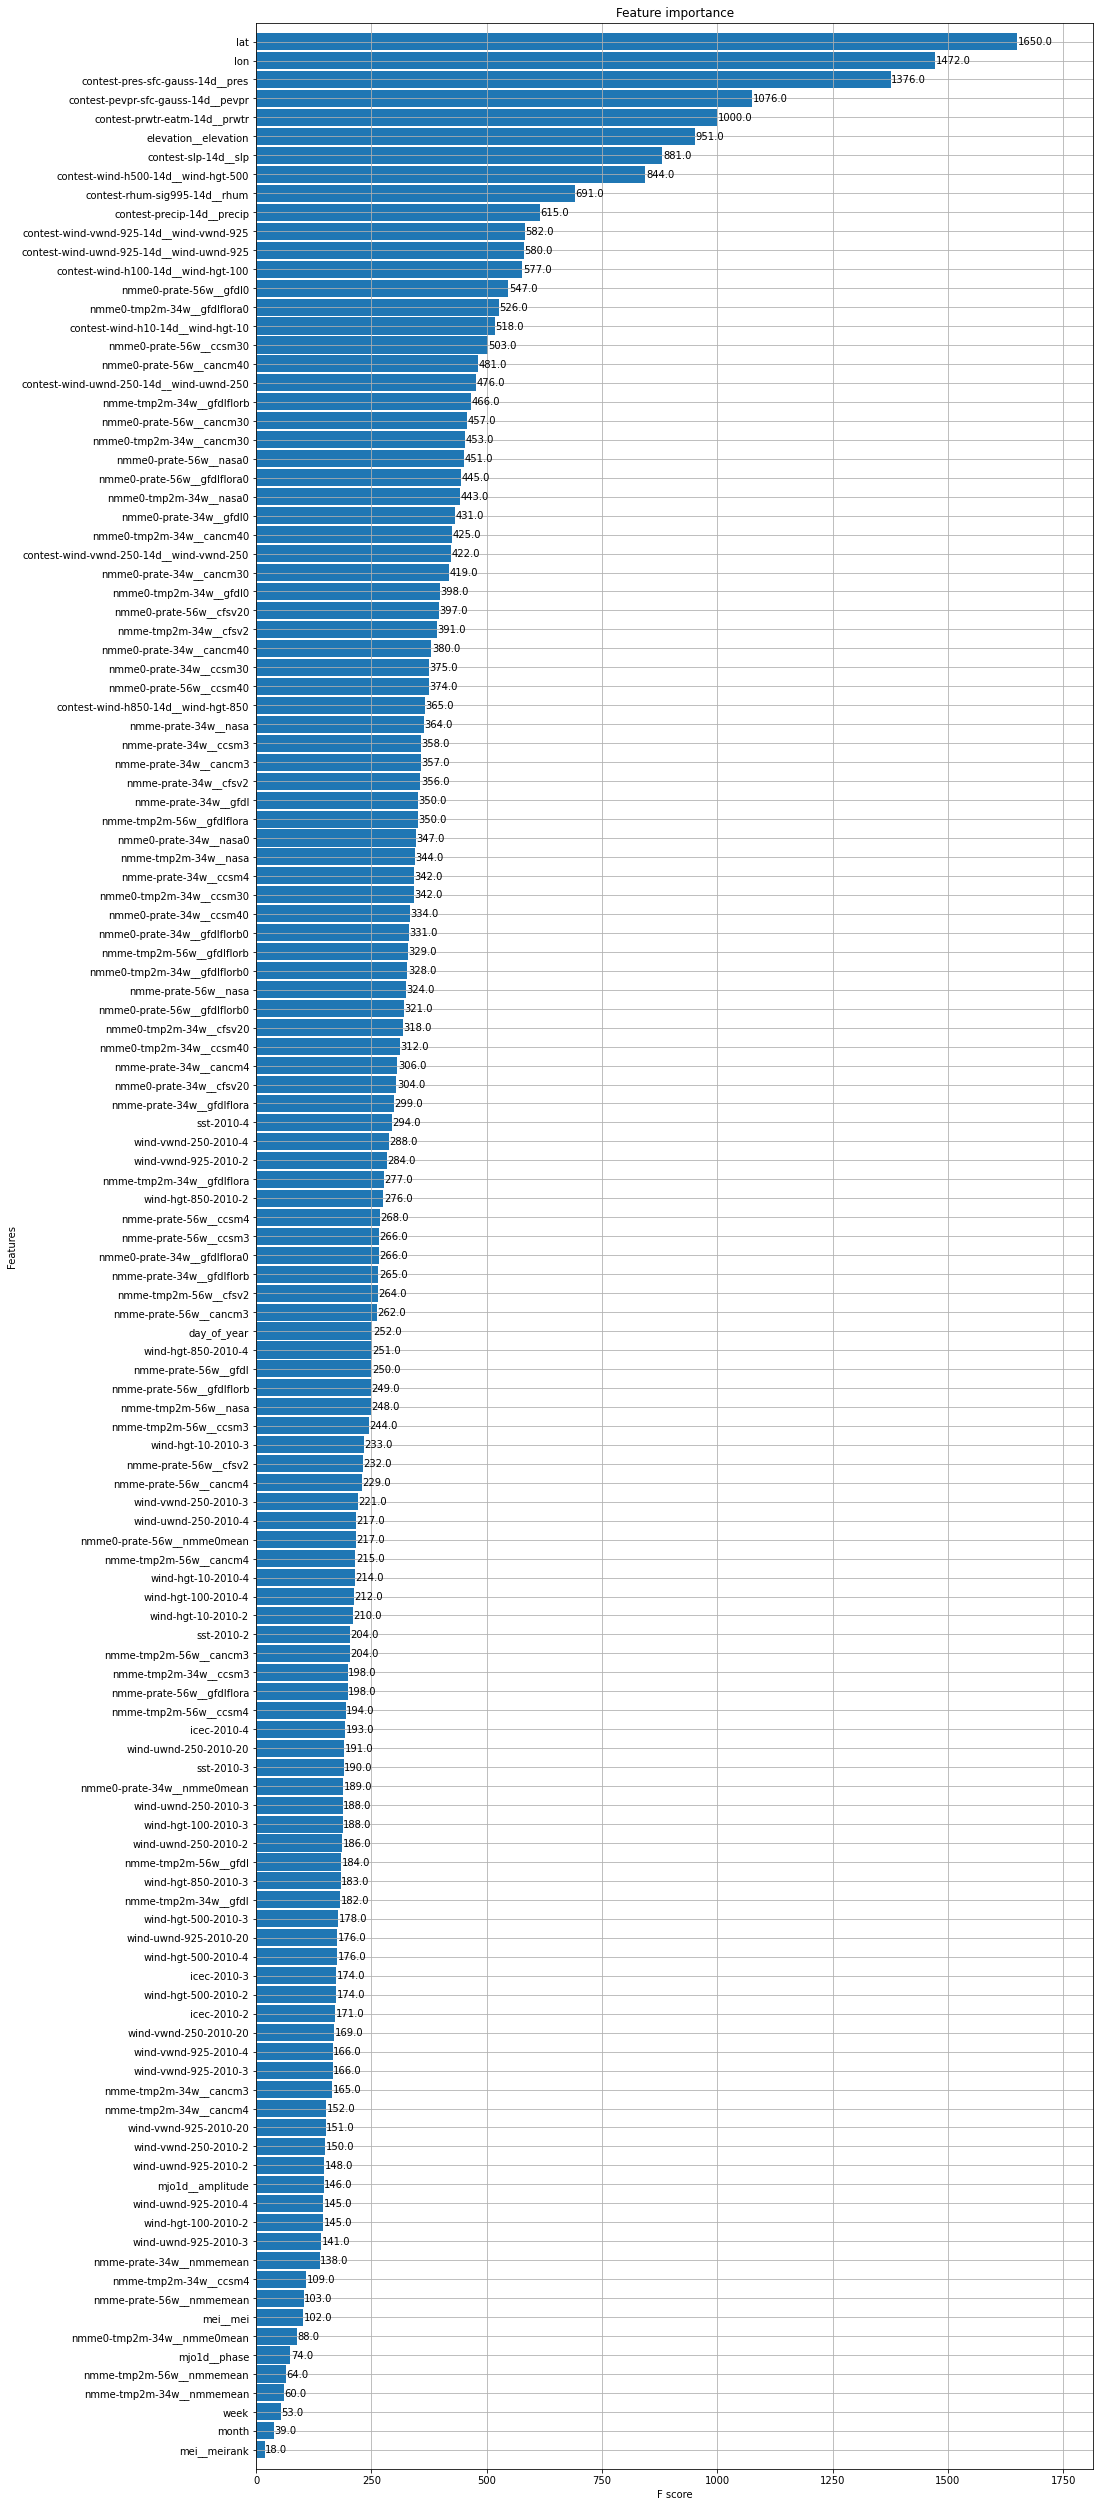

In [72]:
fig, ax = plt.subplots(1,1,figsize=(15,45))
_ = plot_importance(reg, ax=ax, height=0.9)

In [73]:
# Make predictions
pred = reg.predict(X_val)

# 5. Evaluate Predictions

## a. Metrics

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
compare = pd.DataFrame()
compare["location"] = Y.loc[Y["split"] == "val", 'location']
compare['real_target'] = Y_val
compare['pred_target'] = pred
compare = compare.reset_index()

In [76]:
compare.head()

,index,location,real_target,pred_target
0,585,0_0,25.310697,24.335548
1,586,0_0,25.470303,24.313612
2,587,0_0,25.603136,23.972828
3,588,0_0,25.549756,23.747318
4,589,0_0,25.734263,23.762850


In [77]:
metrics = {
    "MSE": round(mean_squared_error(compare["real_target"], compare["pred_target"]), 4),
    "RMSE": round(mean_squared_error(compare["real_target"], compare["pred_target"], squared=False), 4),
    "R2": round(r2_score(compare["real_target"], compare["pred_target"]), 4),
}

In [78]:
for mtrc, val in metrics.items():
    print(f"{mtrc}: {val}")

MSE: 1.8395
RMSE: 1.3563
R2: 0.9544


## b. Graphs

In [79]:
todays_dt = datetime.today().strftime("%Y-%m-%d")

In [80]:
GRAPH_LOC_N = 5

In [81]:
graph_locs = smpl_locs[0:GRAPH_LOC_N].copy()
graph_df = compare[compare["location"].isin(graph_locs)].reset_index(drop=True).copy()

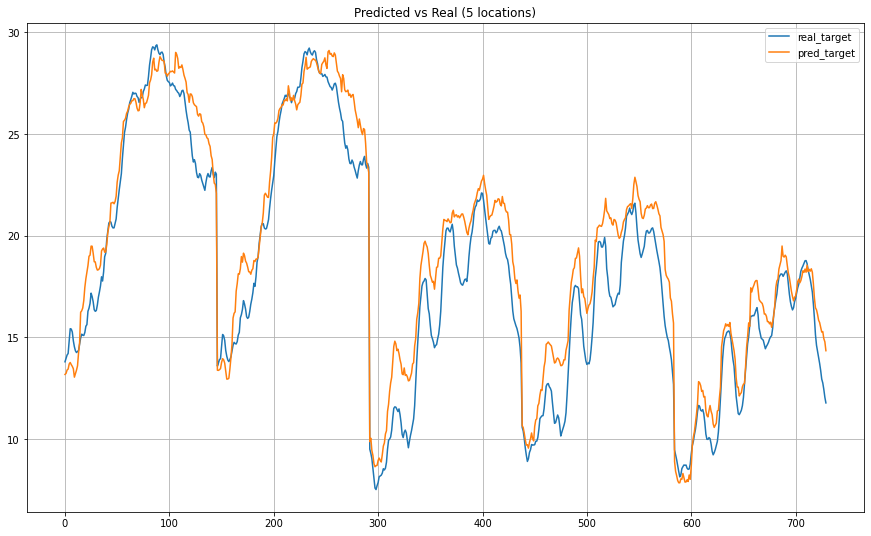

In [82]:
graph_df.plot.line(y=["real_target", "pred_target"], figsize=FIG_SIZE)
plt.title(f"Predicted vs Real ({GRAPH_LOC_N} locations)")
plt.grid()
plt.savefig(f"artifacts/second_draft{TRIAL}_{todays_dt}.png")
plt.show()

## c. Export Model Artifacts

In [83]:
from joblib import dump

In [84]:
params_file = artifact_dir / f"second_draft{TRIAL}_{todays_dt}.json"

In [85]:
params = {
    "algorithm": "XGBoost",
    "scaler": None,
    "missing value strategy": "replace w/ mean",
    "target": {
        "name": TARGET,
        "min": target_min,
        "delta": target_delta,
    },
    "correlation threshold": None,
    "lags": [1],
    "features": feature_cols,
    "sample locations": SMPL_SZ,
    "data rows": train_split.shape[0],
    "model params": model_params,
    "duration": duration,
    "metrics": metrics,
}

In [86]:
with open(params_file, "w") as js_out:
    json.dump(params, js_out, indent=4)

In [87]:
dump(reg, f"artifacts/second_draft{TRIAL}_{todays_dt}.joblib")

['artifacts/second_draft5_2023-02-23.joblib']